Paso 1: Análisis Exploratorio de Datos (EDA)

In [5]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
url = './Unidad 3 - Tarea 5/Titanic-Dataset.csv'
df = pd.read_csv(url)

In [6]:
# Primer vistazo a los datos
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

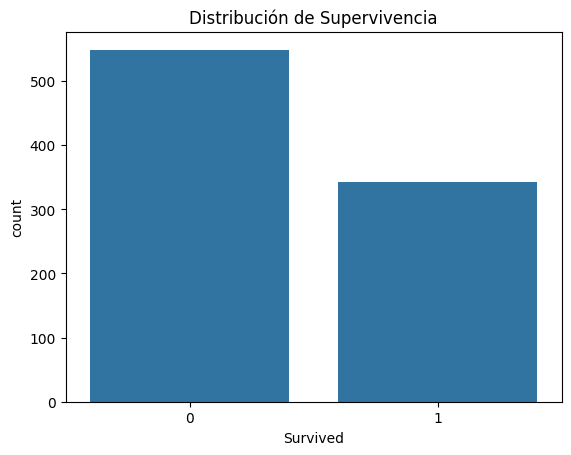

In [7]:
# Distribución de la variable objetivo
sns.countplot(data=df, x='Survived')
plt.title('Distribución de Supervivencia')
plt.show()

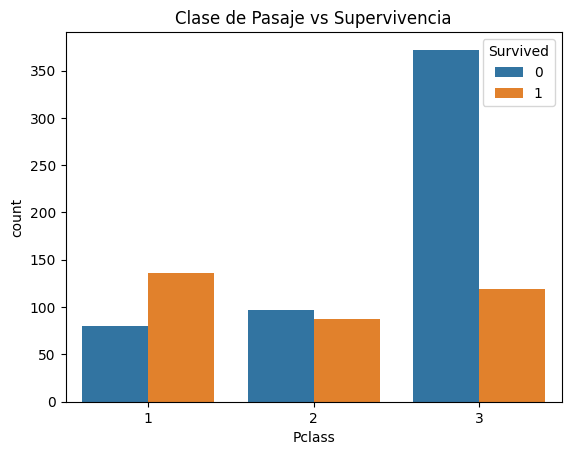

In [8]:
# Relación entre Pclass y Survived
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Clase de Pasaje vs Supervivencia')
plt.show()

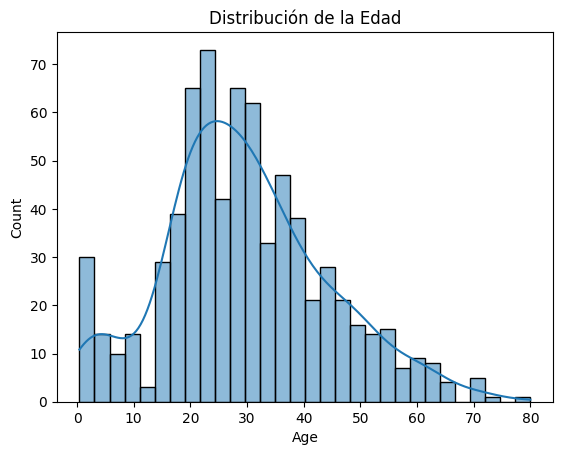

In [9]:
# Distribución de la edad
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Distribución de la Edad')
plt.show()

Paso 2: Preprocesamiento de Datos

In [10]:
# Imputar valores faltantes
df['Age'] = df['Age'].fillna(df['Age'].median())  # Imputar edad con la mediana
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Imputar puerto con la moda
df.drop(columns=['Cabin'], inplace=True)  # Eliminar la columna Cabin debido a muchos valores nulos

# Transformación de variables categóricas
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Codificación binaria para 'Sex'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)  # One-hot encoding para 'Embarked'

# Crear nueva variable 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch']

# Verificar datos preprocesados
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
 12  FamilySize   891 non-null    int64  
dtypes: bool(2), float64(2), int64(7), object(2)
memory usage: 78.4+ KB
None


Paso 3: Selección de Características

In [12]:
# Seleccionar características relevantes
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked_Q', 'Embarked_S']
target = 'Survived'

# Separar X (características) e y (variable objetivo)
X = df[features]
y = df[target]


Paso 4: Dividir el Dataset en Train y Test

In [14]:
from sklearn.model_selection import train_test_split

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Paso 5: Entrenamiento del Modelo

In [15]:
from sklearn.linear_model import LogisticRegression

# Crear y entrenar modelo de Regresión Logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

Paso 6: Evaluación del Modelo

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Predicciones
y_pred = model.predict(X_test)


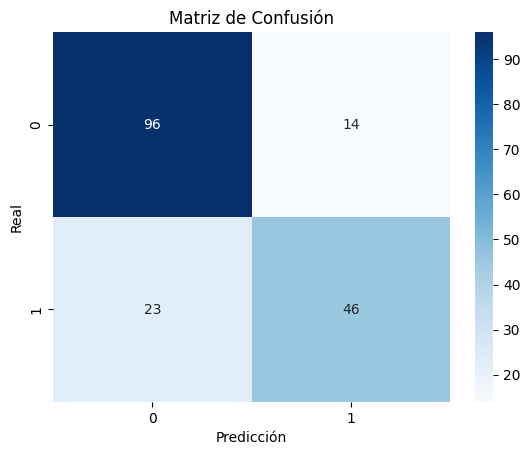

In [17]:

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


In [18]:

# Reporte de clasificación
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



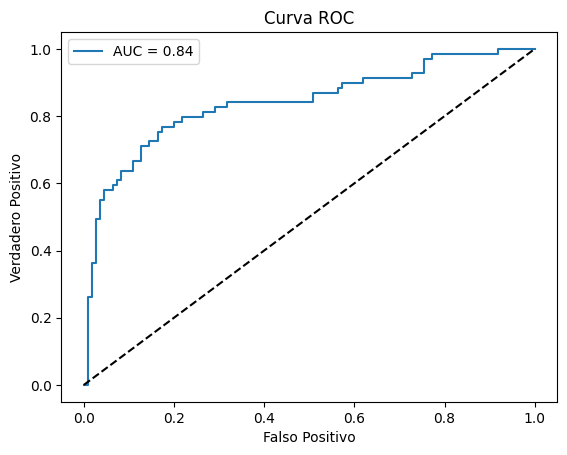

In [20]:

# Curva ROC
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadero Positivo')
plt.legend()
plt.show()


Paso 7: Visualización de Resultados

Ya hemos generado:

La matriz de confusión.
La curva ROC.
Distribuciones de supervivencia y relaciones clave.